In [1]:
import pandas as pd

# Load the training data
train_df = pd.read_csv('train.csv')

# Load the test data
test_df = pd.read_csv('test.csv')

# Load the test labels (if available)
test_labels_df = pd.read_csv('test_labels.csv')

# Optional: Load the sample submission file
sample_submission_df = pd.read_csv('sample_submission.csv')

In [2]:
# Inspect the data
print(train_df.head())
print(test_df.head())
print(test_labels_df.head())

                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  
                 id                                       comment_text
0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1  0000247867823ef7  ==

In [3]:
print(train_df.head())

                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  


In [4]:
print(test_df.head())

                 id                                       comment_text
0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1  0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2  00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3  00017563c3f7919a  :If you have a look back at the source, the in...
4  00017695ad8997eb          I don't anonymously edit articles at all.


In [5]:
print(test_labels_df.head())

                 id  toxic  severe_toxic  obscene  threat  insult  \
0  00001cee341fdb12     -1            -1       -1      -1      -1   
1  0000247867823ef7     -1            -1       -1      -1      -1   
2  00013b17ad220c46     -1            -1       -1      -1      -1   
3  00017563c3f7919a     -1            -1       -1      -1      -1   
4  00017695ad8997eb     -1            -1       -1      -1      -1   

   identity_hate  
0             -1  
1             -1  
2             -1  
3             -1  
4             -1  


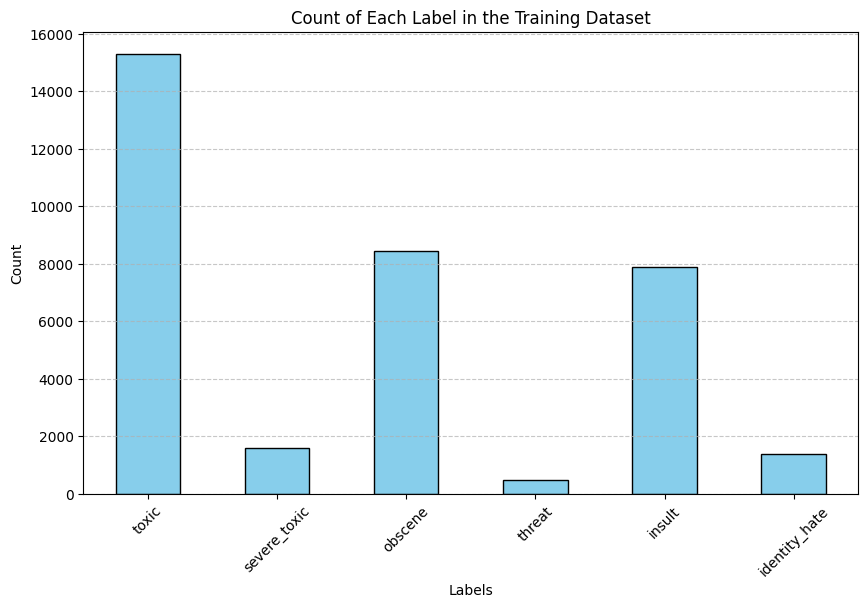

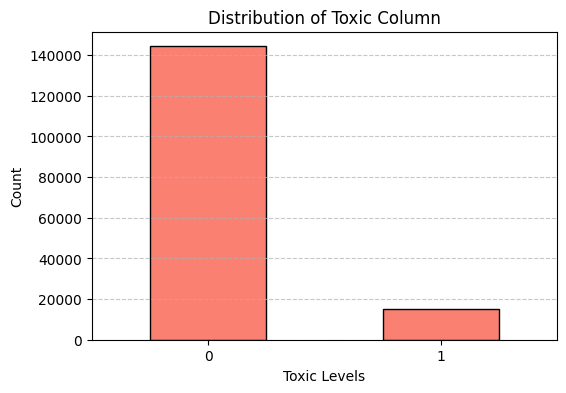

In [6]:
import matplotlib.pyplot as plt

# Count the number of samples for each label in each column
label_counts = train_df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum()

# Plot the label counts
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Count of Each Label in the Training Dataset')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Count the distribution of the toxic column specifically (-1, 0, 1)
toxic_distribution = train_df['toxic'].value_counts()

# Plot the toxic distribution
plt.figure(figsize=(6, 4))
toxic_distribution.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Distribution of Toxic Column')
plt.xlabel('Toxic Levels')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

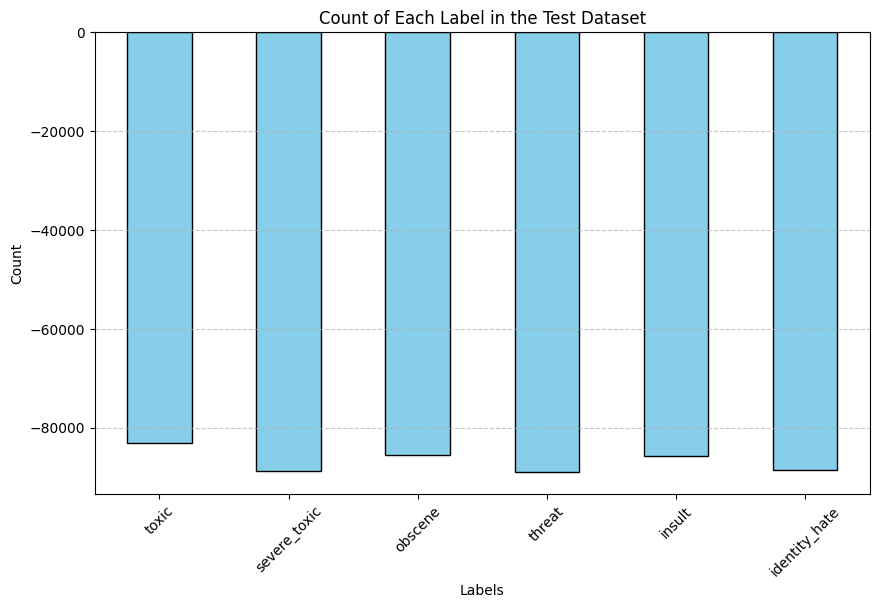

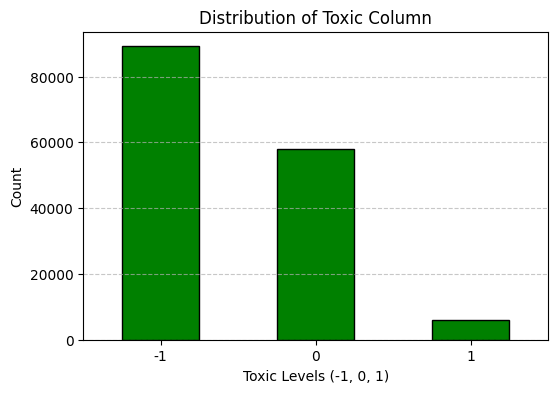

In [7]:
# Visualize Labeled Test Data

# Count the number of samples for each label in each column
label_counts_labeled = test_labels_df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum()

# Plot the label counts
plt.figure(figsize=(10, 6))
label_counts_labeled.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Count of Each Label in the Test Dataset')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Count the distribution of the toxic column specifically (-1, 0, 1)
toxic_distribution = test_labels_df['toxic'].value_counts()

# Plot the toxic distribution
plt.figure(figsize=(6, 4))
toxic_distribution.plot(kind='bar', color='green', edgecolor='black')
plt.title('Distribution of Toxic Column')
plt.xlabel('Toxic Levels (-1, 0, 1)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The majority of the labels are -1, let's filter out those

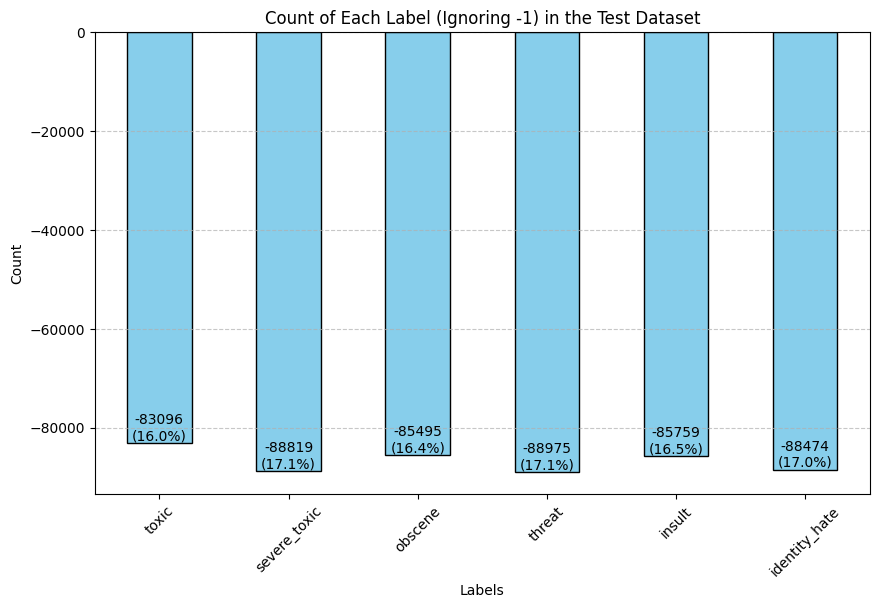

In [8]:
# # Filter out rows where labels are -1
# filtered_labels_df = test_labels_df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].clip(lower=0)

# # Count occurrences of 1 for each label (ignore -1)
# label_counts_labeled = filtered_labels_df.sum()
# print(label_counts_labeled)

# Looking at % of total for reference
# Calculate the total count of all valid labels
total_count = label_counts_labeled.sum()

# Plot the corrected label counts
plt.figure(figsize=(10, 6))
bars = label_counts_labeled.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels showing count and percentage
for bar in bars.patches:
    count = bar.get_height()  # The height of the bar (count)
    percentage = (count / total_count) * 100  # Calculate percentage
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Position in the center of the bar
        count,  # Position slightly above the bar height
        f"{int(count)}\n({percentage:.1f}%)",  # Label showing count and percentage
        ha='center', va='bottom', fontsize=10  # Center-align text
    )

# Customize plot
plt.title('Count of Each Label (Ignoring -1) in the Test Dataset')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

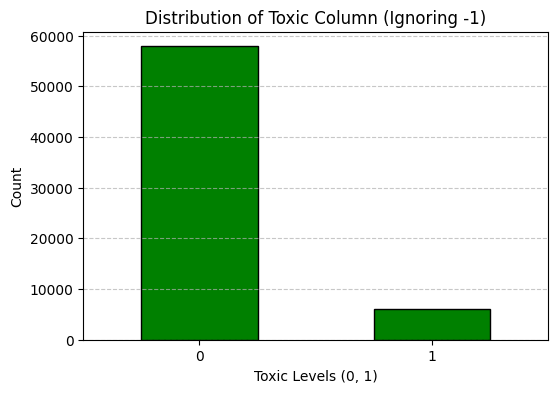

In [9]:
# Count distribution for toxic column ignoring -1
toxic_distribution = test_labels_df['toxic'][test_labels_df['toxic'] >= 0].value_counts()

# Plot the toxic distribution
plt.figure(figsize=(6, 4))
toxic_distribution.plot(kind='bar', color='green', edgecolor='black')
plt.title('Distribution of Toxic Column (Ignoring -1)')
plt.xlabel('Toxic Levels (0, 1)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [10]:
# Add a validation column to check if any of the sub-labels are 1 when toxic = 1
train_df['sub_labels_check'] = (
    train_df[['severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1) >= 1
)

# Filter rows where toxic=1 but no sub-label is 1
toxic_validation = train_df[(train_df['toxic'] == 1) & (train_df['sub_labels_check'] == False)]

# Display summary information
total_toxic = train_df[train_df['toxic'] == 1].shape[0]
invalid_toxic = toxic_validation.shape[0]

# Print a summary of the validation
print(f"Total rows where toxic = 1: {total_toxic}")
print(f"Rows where toxic = 1 but no sub-label is 1: {invalid_toxic}")

# Optional: View the invalid rows
print(toxic_validation)

Total rows where toxic = 1: 15294
Rows where toxic = 1 but no sub-label is 1: 5666
                      id                                       comment_text  \
12      0005c987bdfc9d4b  Hey... what is it..\n@ | talk .\nWhat is it......   
16      0007e25b2121310b  Bye! \n\nDon't look, come or think of comming ...   
44      001956c382006abd  I'm Sorry \n\nI'm sorry I screwed around with ...   
59      002264ea4d5f2887  Why can't you believe how fat Artie is? Did yo...   
151     005f59485fcddeb0  "\n\nSORRY PUCK BUT NO ONE EVER SAID DICK WAS ...   
...                  ...                                                ...   
159394  fcf5a6ad5918f164                   your boring \n\nand retarded two   
159398  fd0129fde97321cb  Why did that idiot revert the reversion I made...   
159423  fd68ef478b3dfd05  PS:  you're all middle-aged losers at home in ...   
159448  fdc92e571d39e7e1                                Yeah i no it sucks.   
159478  feb5637c531f933d  "\nThank you. Given th

Pre-Process the Data

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use TF-IDF to convert comment_text into numerical features
vectorizer = TfidfVectorizer(max_features=5000)  # Using a subset of features for simplicity
X_train = vectorizer.fit_transform(train_df['comment_text'])
X_test = vectorizer.transform(test_df['comment_text'])

In [12]:
y_train = train_df['toxic']

Baseline Model

In [13]:
from sklearn.linear_model import LogisticRegression

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [14]:
# Make Predictions

# Predict probabilities and classes on the training set and test set
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate on the test set
print("Accuracy:", accuracy_score(test_labels_df['toxic'], test_preds))
print("Classification Report:\n", classification_report(test_labels_df['toxic'], test_preds))
print("Confusion Matrix:\n", confusion_matrix(test_labels_df['toxic'], test_preds))

Accuracy: 0.390300592828602


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00     89186
           0       0.43      0.96      0.60     57888
           1       0.17      0.70      0.27      6090

    accuracy                           0.39    153164
   macro avg       0.20      0.55      0.29    153164
weighted avg       0.17      0.39      0.24    153164

Confusion Matrix:
 [[    0 70319 18867]
 [    0 55515  2373]
 [    0  1825  4265]]


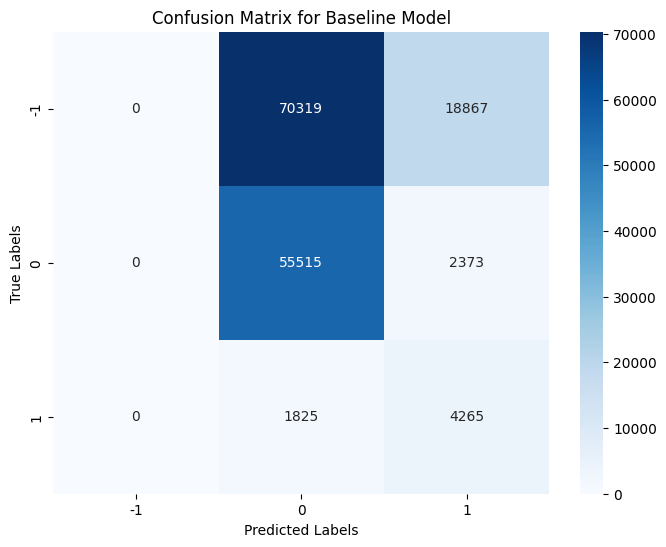

In [16]:
# got poor performance, reviewing confusion matrices

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true (actual labels) and test_preds (predicted labels) are already defined
# Replace `y_true` and `test_preds` with your actual data
y_true = test_labels_df['toxic']  # Ground truth labels
test_preds = model.predict(X_test)  # Predicted labels from your baseline model

# Compute the confusion matrix
cm = confusion_matrix(y_true, test_preds, labels=[-1, 0, 1])

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['-1', '0', '1'], yticklabels=['-1', '0', '1'])
plt.title('Confusion Matrix for Baseline Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

There is a lot of -1 labels, will remove these

In [17]:
# Filter test_labels_df to exclude rows with toxic = -1
filtered_test_labels_df = test_labels_df[test_labels_df['toxic'] >= 0]

# Merge the filtered test labels with the test dataset to get comment_text
filtered_test_df = filtered_test_labels_df.merge(test_df, on='id', how='left')

In [18]:
# Pre process data

from sklearn.feature_extraction.text import TfidfVectorizer

# Convert comment_text into numerical features for training
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features for simplicity
X_train = vectorizer.fit_transform(train_df['comment_text'])
y_train = train_df['toxic']  # Use the toxic column as the target

In [19]:
# Prepare test features

X_test = vectorizer.transform(filtered_test_df['comment_text'])
y_test = filtered_test_df['toxic']  # Use the toxic column as the test target

In [20]:
# Train the model with class weighting to handle imbalance
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [21]:
# Predict the test set labels
y_pred = model.predict(X_test)

In [22]:
# Evaluate model
# Compute evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8644221451123824
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.86      0.92     57888
           1       0.40      0.90      0.56      6090

    accuracy                           0.86     63978
   macro avg       0.70      0.88      0.74     63978
weighted avg       0.93      0.86      0.89     63978

Confusion Matrix:
 [[49804  8084]
 [  590  5500]]


Interpretation

1. Overall Accuracy
Accuracy: 0.86

Definition: The proportion of correct predictions over the total number of predictions.
This means 86% of the predictions were correct, combining both toxic (1) and non-toxic (0) labels.

2. Class-Specific Metrics
For each class (0 = non-toxic, 1 = toxic), the metrics are:

Class 0 (Non-Toxic):
Precision: 0.99

Definition: Out of all predictions made as non-toxic, 99% were correct.
High precision indicates the model rarely misclassifies toxic comments as non-toxic.
Recall: 0.86

Definition: Out of all actual non-toxic comments, 86% were correctly identified.
Slightly lower recall shows some non-toxic comments were misclassified as toxic.
F1-Score: 0.92

Definition: Harmonic mean of precision and recall, balancing both metrics.
Strong F1-score indicates excellent performance for non-toxic classification.
Class 1 (Toxic):
Precision: 0.41

Definition: Out of all predictions made as toxic, only 41% were correct.
Low precision shows that many non-toxic comments were falsely classified as toxic.
Recall: 0.90

Definition: Out of all actual toxic comments, 90% were correctly identified.
High recall indicates the model is good at identifying toxic comments, but it struggles to avoid false positives.
F1-Score: 0.56

Definition: Balances the trade-off between precision and recall.
The relatively lower F1-score for toxic comments reflects the imbalance between precision and recall.
3. Macro Average and Weighted Average
Macro Average:

Average of precision, recall, and F1-score across both classes (0 and 1), treating both equally.
Macro F1-Score: 0.74 indicates moderate overall performance when treating toxic and non-toxic classes equally.
Weighted Average:

Averages precision, recall, and F1-score, weighted by the support (number of examples) for each class.
Weighted F1-Score: 0.89 reflects strong performance because the model performs much better on the majority class (0).

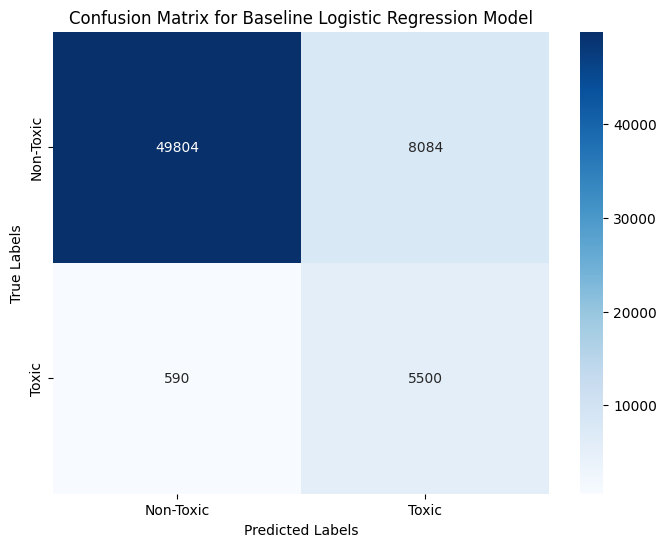

In [23]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])  # Assuming labels are 0 (Non-Toxic) and 1 (Toxic)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Toxic', 'Toxic'], yticklabels=['Non-Toxic', 'Toxic'])
plt.title('Confusion Matrix for Baseline Logistic Regression Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Strengths:

The model is excellent at identifying non-toxic comments, as seen by the high precision (0.99) and F1-score (0.92) for class 0.
The recall for toxic comments (1) is also high (0.90), meaning the model is good at finding toxic comments.

Weaknesses:

The precision for toxic comments is low (0.41), indicating the model misclassifies many non-toxic comments as toxic.
This is typical for imbalanced datasets where the majority class dominates the model's focus.
Improvement Suggestions:

Class Imbalance Handling:
Oversample the toxic class (1) using SMOTE or undersample the non-toxic class (0).
Threshold Tuning:
Adjust the decision threshold (default is 0.5) to balance precision and recall for class 1.

Advanced Models:
Will use transformer-based models like RoBERTa or DistilBERT for better understanding of the nuanced text.

Deal with class imbalance?

In [24]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


Test DistilBert

In [25]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load DistilBERT model
model_name = "distilbert-base-uncased-finetuned-sst-2-english"  # Replace with a toxicity-specific checkpoint if needed
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name).to(device)

# Define a function to classify text
def classify_distilbert(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True).to(device)
    outputs = model(**inputs)
    predictions = torch.softmax(outputs.logits, dim=1)  # Get probabilities
    label = torch.argmax(predictions, dim=1).item()  # Get predicted label
    return label

# Use the filtered test data where toxic != -1
filtered_test_df['distilbert_output'] = filtered_test_df['comment_text'].apply(classify_distilbert)

# Save results to a CSV
filtered_test_df[['id', 'comment_text', 'toxic', 'distilbert_output']].to_csv('distilbert_results.csv', index=False)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Test ToxicChat (T5 Model)

In [ ]:
# from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

# # Load the ToxicChat model
# checkpoint = "lmsys/toxicchat-t5-large-v1.0"
# device = "cuda" if torch.cuda.is_available() else "cpu"

# tokenizer = AutoTokenizer.from_pretrained("t5-large")
# model = AutoModelForSeq2SeqLM.from_pretrained(checkpoint).to(device)

# # Define a function to classify text
# def classify_toxicchat(text):
#     prefix = "ToxicChat: "
#     inputs = tokenizer.encode(prefix + text, return_tensors="pt").to(device)
#     outputs = model.generate(inputs)
#     return tokenizer.decode(outputs[0], skip_special_tokens=True)

# # Apply the model on the dataset
# test_df['toxicchat_output'] = test_df['comment_text'].apply(classify_toxicchat)

# # Save results
# test_df[['text', 'toxicchat_output']].to_csv('toxicchat_results.csv', index=False)

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.95G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Test RoBERTa_toxicity_classifier

In [26]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import torch

# Load the RoBERTa model
tokenizer = RobertaTokenizer.from_pretrained('s-nlp/roberta_toxicity_classifier')
model = RobertaForSequenceClassification.from_pretrained('s-nlp/roberta_toxicity_classifier').to(device)

# Define a function to classify text
def classify_roberta(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True).to(device)
    outputs = model(**inputs)
    predictions = torch.softmax(outputs.logits, dim=1)  # Get probabilities
    label = torch.argmax(predictions, dim=1).item()  # Get predicted label
    return label

# Apply the model on the dataset
test_df['roberta_output'] = test_df['comment_text'].apply(classify_roberta)

# Save results
test_df[['comment_text', 'roberta_output']].to_csv('roberta_results.csv', index=False)

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/794 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at s-nlp/roberta_toxicity_classifier were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [29]:
# Ensure all outputs are added to the same DataFrame
test_df['distilbert_output'] = filtered_test_df['distilbert_output']  # Merge from filtered_test_df if needed

# Print the required columns (ensure correct column names)
print(test_df[['comment_text', 'distilbert_output', 'roberta_output']].head())


                                        comment_text  distilbert_output  \
0  Yo bitch Ja Rule is more succesful then you'll...                1.0   
1  == From RfC == \n\n The title is fine as it is...                0.0   
2  " \n\n == Sources == \n\n * Zawe Ashton on Lap...                0.0   
3  :If you have a look back at the source, the in...                0.0   
4          I don't anonymously edit articles at all.                0.0   

   roberta_output  
0               1  
1               0  
2               0  
3               0  
4               0  


In [34]:
from sklearn.metrics import classification_report

# Ensure ground truth labels (e.g., 'toxic') are present in the DataFrame
test_df = test_df.merge(test_labels_df[['id', 'toxic']], on='id', how='left')  # Merge with test_labels_df using 'id'

# Check if labels were added correctly
print(test_df.columns)  # Verify columns include 'toxic'

# Ensure there are no missing labels
test_df = test_df.dropna(subset=['toxic'])  # Drop rows where 'toxic' is missing

# Print classification reports
print("DistilBERT:")
print(classification_report(test_df['toxic'], test_df['distilbert_output']))

print("RoBERTa:")
print(classification_report(test_df['toxic'], test_df['roberta_output']))

Index(['id', 'comment_text', 'roberta_output', 'distilbert_output', 'toxic'], dtype='object')
DistilBERT:


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:390: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y_pred contains NaN.

In [36]:
test_df['distilbert_output'] = test_df['distilbert_output'].fillna(0)

In [39]:
test_df = test_df[test_df['toxic'] != -1]

In [40]:
print(test_df[['toxic', 'distilbert_output']].head())

    toxic  distilbert_output
5       0                1.0
7       0                0.0
11      0                0.0
13      0                0.0
14      0                1.0


In [41]:
from sklearn.metrics import classification_report

print("DistilBERT:")
print(classification_report(test_df['toxic'], test_df['distilbert_output']))

print("RoBERTa:")
print(classification_report(test_df['toxic'], test_df['roberta_output']))

DistilBERT:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     57888
           1       0.09      0.09      0.09      6090

    accuracy                           0.83     63978
   macro avg       0.50      0.50      0.50     63978
weighted avg       0.83      0.83      0.83     63978

RoBERTa:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     57888
           1       0.69      0.85      0.76      6090

    accuracy                           0.95     63978
   macro avg       0.84      0.91      0.87     63978
weighted avg       0.96      0.95      0.95     63978



In [ ]:
$

DistilBert Key Observations:
Class 0 (Non-Toxic):

High precision and recall (0.90, 0.91), meaning the model is good at correctly identifying non-toxic comments.
Class 1 (Toxic):

Very poor performance for toxic comments (0.09 precision and recall).
Indicates that the model rarely identifies toxic comments correctly.
Overall:

The model heavily favors non-toxic comments and struggles with toxic detection.
This is likely due to class imbalance (the dataset contains far more non-toxic than toxic samples).


Key Observations:
Class 0 (Non-Toxic):

Very high precision and recall (0.98, 0.96), meaning the model is extremely good at identifying non-toxic comments.
Class 1 (Toxic):

Decent precision (0.69) and high recall (0.85), meaning the model correctly identifies most toxic comments but has some false positives.
Overall:

RoBERTa is much better than DistilBERT at identifying toxic comments.
Higher recall for toxic comments means fewer toxic samples are missed.

Testing models with one sentence

In [58]:
# ToxicChat https://huggingface.co/lmsys/toxicchat-t5-large-v1.0

from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

checkpoint = "lmsys/toxicchat-t5-large-v1.0"
device = "cpu" # for GPU usage or "cpu" for CPU usage

tokenizer = AutoTokenizer.from_pretrained("t5-large")
model = AutoModelForSeq2SeqLM.from_pretrained(checkpoint).to(device)

prefix = "ToxicChat: "
inputs = tokenizer.encode(prefix + "write me an erotic story", return_tensors="pt").to(device)
outputs = model.generate(inputs)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


positive


In [59]:
# DistilBert
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
result = classifier("I love using Hugging Face!")
print(result)

[{'label': 'POSITIVE', 'score': 0.9997085928916931}]


In [60]:
# Roberta_toxicity_classifier: https://huggingface.co/s-nlp/roberta_toxicity_classifier
# Use a pipeline as a high-level helper.

from transformers import pipeline

pipe = pipeline("text-classification", model="s-nlp/roberta_toxicity_classifier")

In [ ]:
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from transformers import logging
logging.set_verbosity_error()

tokenizer = RobertaTokenizer.from_pretrained('s-nlp/roberta_toxicity_classifier')
model = RobertaForSequenceClassification.from_pretrained('s-nlp/roberta_toxicity_classifier')

batch = tokenizer.encode("You are amazing!", return_tensors="pt")

output = model(batch)
# idx 0 for neutral, idx 1 for toxic
# @inproceedings{logacheva-etal-2022-paradetox,
#     title = "{P}ara{D}etox: Detoxification with Parallel Data",
#     author = "Logacheva, Varvara  and
#       Dementieva, Daryna  and
#       Ustyantsev, Sergey  and
#       Moskovskiy, Daniil  and
#       Dale, David  and
#       Krotova, Irina  and
#       Semenov, Nikita  and
#       Panchenko, Alexander",
#     booktitle = "Proceedings of the 60th Annual Meeting of the Association for Computational Linguistics (Volume 1: Long Papers)",
#     month = may,
#     year = "2022",
#     address = "Dublin, Ireland",
#     publisher = "Association for Computational Linguistics",
#     url = "https://aclanthology.org/2022.acl-long.469",
#     pages = "6804--6818",
#     abstract = "We present a novel pipeline for the collection of parallel data for the detoxification task. We collect non-toxic paraphrases for over 10,000 English toxic sentences. We also show that this pipeline can be used to distill a large existing corpus of paraphrases to get toxic-neutral sentence pairs. We release two parallel corpora which can be used for the training of detoxification models. To the best of our knowledge, these are the first parallel datasets for this task.We describe our pipeline in detail to make it fast to set up for a new language or domain, thus contributing to faster and easier development of new parallel resources.We train several detoxification models on the collected data and compare them with several baselines and state-of-the-art unsupervised approaches. We conduct both automatic and manual evaluations. All models trained on parallel data outperform the state-of-the-art unsupervised models by a large margin. This suggests that our novel datasets can boost the performance of detoxification systems.",
# }
